In [8]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from Functions import split_data
from Functions import engineer_features
from Functions import accuracy_scorer
from Functions import remove_outliers
from Functions import normalize

from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('./FIFA18_players_database/CompleteDataset.csv', low_memory=False)

In [3]:
data = engineer_features(data)
data =data.sample(frac=1).reset_index(drop=True)
data.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Preferred Positions
0,64,48,58,69,53,48,34,37,57,62,...,47,46,47,20,69,57,28,60,43,ST
1,88,36,81,77,61,62,63,47,64,45,...,59,66,59,18,73,63,19,41,69,CAM RW LW
2,79,61,75,66,59,48,29,31,54,65,...,47,56,50,28,82,70,39,71,40,ST
3,87,57,87,78,61,57,44,49,65,63,...,67,58,63,22,86,76,27,60,60,ST
4,82,52,83,82,66,62,66,64,65,60,...,61,63,63,46,77,75,45,57,65,RM


In [4]:
X_train, X_test, y_train, y_test = split_data(data, 0)

In [7]:
svm_classifier = SVC(kernel='rbf', C=100, gamma=0.03571429)
svm_classifier.fit(X_train, y_train)
y_test_pred = svm_classifier.predict(X_test)
y_train_pred = svm_classifier.predict(X_train)

# Calculate test and train accuracy
acc_train = accuracy_scorer(y_train, y_train_pred)
acc_test = accuracy_scorer(y_test, y_test_pred)

# Print accuracy with 3 decimals
print(f"Accuracy of train: {acc_train:.3f}")
print(f"Accuracy of test: {acc_test:.3f}")

Accuracy of train: 0.592
Accuracy of test: 0.249


In [10]:
X_train_minmax = normalize(X_train, "minmax")
X_test_minmax = normalize(X_test, "minmax")

In [14]:
svm_classifier = SVC(kernel='rbf', C=100, gamma=0.03571429)
svm_classifier.fit(X_train_minmax, y_train)
y_test_pred = svm_classifier.predict(X_test_minmax)
y_train_pred = svm_classifier.predict(X_train_minmax)

# Calculate test and train accuracy
acc_train = accuracy_scorer(y_train, y_train_pred)
acc_test = accuracy_scorer(y_test, y_test_pred)

# Print accuracy with 3 decimals
print(f"Accuracy of train: {acc_train:.3f}")
print(f"Accuracy of test: {acc_test:.3f}")

Accuracy of train: 0.470
Accuracy of test: 0.787


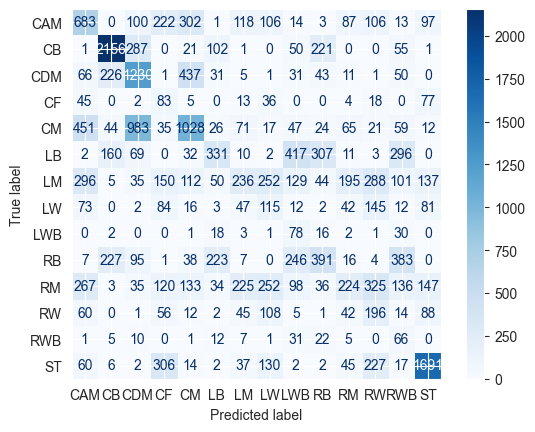

In [93]:
# Matrix of train
ConfusionMatrixDisplay.from_estimator(svm_classifier, X_train, y_train, cmap="Blues")

Notice the predictions, ex: CDM is predicted as both CDM and CM.

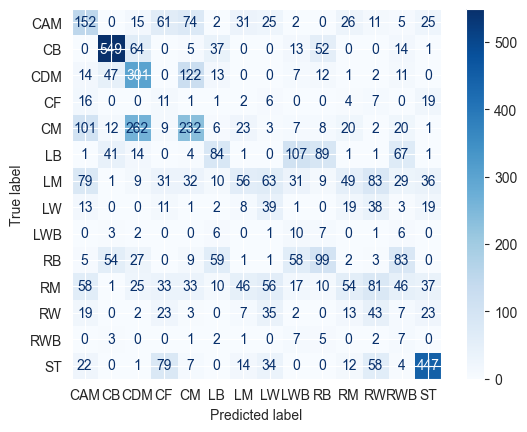

In [94]:
# Matrix of test
ConfusionMatrixDisplay.from_estimator(svm_classifier, X_test, y_test, cmap="Blues")

In [95]:
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'kernel': ['linear', 'rbf'],      # Kernel type
    'gamma': ['scale', 'auto'],       # Kernel coefficient
    'class_weight': ['balanced', None]  # Class weights
}

grid_search = GridSearchCV(estimator = svm_classifier, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Perform grid search on training data
grid_search.fit(X_test, y_test)

# Best parameters and model
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Hyperparameters: {'C': 10, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf'}


Took too long to run grid search on the train data, so did it on the test data.

In [96]:
svm_classifierRBF = SVC(kernel='rbf', C=10, gamma=0.03571429)

svm_classifierRBF.fit(X_train, y_train)
y_test_predRBF = svm_classifierRBF.predict(X_test)
y_train_predRBF = svm_classifierRBF.predict(X_train)

# Calculate test and train accuracy
acc_train = accuracy_score(y_train, y_train_predRBF)
acc_test = accuracy_score(y_test, y_test_predRBF)

# Print accuracy with 3 decimals
print(f"Accuracy of train: {acc_train:.3f}")
print(f"Accuracy of test: {acc_test:.3f}")


Accuracy of train: 0.473
Accuracy of test: 0.458


Marginal improvement result with RBF, and C=100.

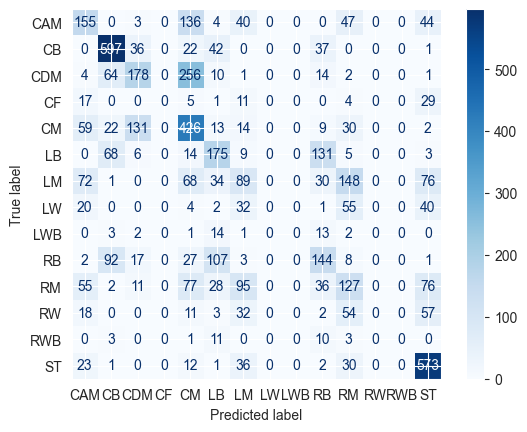

In [97]:
ConfusionMatrixDisplay.from_estimator(svm_classifierRBF, X_test, y_test, cmap="Blues")

Okey lets try with data that is not-normalized and includes outliers.

In [98]:
X_train, X_test, y_train, y_test = split_data() 

In [99]:
num_rows_X_train = X_train.shape[0]
num_rows_X_test = X_test.shape[0]
num_rows_y_train = y_train.shape[0]
num_rows_y_test = y_test.shape[0]

print(f"Number of rows in X_train: {num_rows_X_train}")
print(f"Number of rows in X_test: {num_rows_X_test}")
print(f"Number of rows in y_train: {num_rows_y_train}")
print(f"Number of rows in y_test: {num_rows_y_test}")

Number of rows in X_train: 21551
Number of rows in X_test: 3191
Number of rows in y_train: 21551
Number of rows in y_test: 3191


In [100]:
svm_classifierRBF = SVC(kernel='rdf', C=100, gamma=0.03571429)

svm_classifierRBF.fit(X_train, y_train)
y_test_predRBF = svm_classifierRBF.predict(X_test)
y_train_predRBF = svm_classifierRBF.predict(X_train)

# Calculate test and train accuracy
acc_train = accuracy_score(y_train, y_train_predRBF)
acc_test = accuracy_score(y_test, y_test_predRBF)

# Print accuracy with 3 decimals
print(f"Accuracy of train: {acc_train:.3f}")
print(f"Accuracy of test: {acc_test:.3f}")

Accuracy of train: 0.464
Accuracy of test: 0.000


In [101]:
y_test_predRBF[:15]

array(['ST', 'CM', 'LM', 'CDM', 'ST', 'CB', 'CB', 'CB', 'CB', 'CAM', 'LM',
       'ST', 'CM', 'CM', 'CB'], dtype=object)

In [102]:
y_train_predRBF[:15]

array(['CB', 'LB', 'LB', 'CB', 'CB', 'ST', 'ST', 'LB', 'RM', 'RM', 'LB',
       'ST', 'CB', 'RM', 'CAM'], dtype=object)

The SVM is now overfitted, due to the outliers and non normalizaion of data.

In [103]:
# Testing on only non normalized data and data that excludes outliers.
df_NoOutliers = pd.read_csv("./FIFA18_players_database/clean_data_W_O_outliers.csv")
X = df_NoOutliers.drop(columns=['Preferred Positions'])
y = df_NoOutliers['Preferred Positions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm_classifierRBF = SVC(kernel='rdf', C=100, gamma=0.03571429)

svm_classifierRBF.fit(X_train, y_train)
y_test_predRBF = svm_classifierRBF.predict(X_test)
y_train_predRBF = svm_classifierRBF.predict(X_train)

# Calculate test and train accuracy
acc_train = accuracy_score(y_train, y_train_predRBF)
acc_test = accuracy_score(y_test, y_test_predRBF)

# Print accuracy with 3 decimals
print(f"Accuracy of train: {acc_train:.3f}")
print(f"Accuracy of test: {acc_test:.3f}")


Still really bad lets try with normalized and outliers removed. Accuracy of train: 0.421
Accuracy of test: 0.416

In [ ]:
df_NoOutliers = pd.read_csv('./FIFA18_players_database/clean_data_normalized_W_O_outliers.csv')
X = df_NoOutliers.drop(columns=['Preferred Positions'])
y = df_NoOutliers['Preferred Positions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm_classifierRBF = SVC(kernel='rdf', C=100, gamma=0.03571429)

svm_classifierRBF.fit(X_train, y_train)
y_test_predRBF = svm_classifierRBF.predict(X_test)
y_train_predRBF = svm_classifierRBF.predict(X_train)

# Calculate test and train accuracy
acc_train = accuracy_score(y_train, y_train_predRBF)
acc_test = accuracy_score(y_test, y_test_predRBF)

# Print accuracy with 3 decimals
print(f"Accuracy of train: {acc_train:.3f}")
print(f"Accuracy of test: {acc_test:.3f}")

Accuracy of train: 0.434
Accuracy of test: 0.406 RDF